# Calculating MACD and EMA  

In [1]:
# Imports 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the apple data
df = pd.read_csv('aapl.us_2014-2024.csv')
df.head()

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
0,2014-09-07,23.0926,23.2441,21.9112,22.1763,1.441329e+09
1,2014-09-14,22.2481,23.0946,21.5393,22.7785,2.061262e+09
2,2014-09-21,23.0387,23.0896,22.1574,22.6200,1.326479e+09
3,2014-09-28,22.8095,23.0666,21.8952,22.5771,1.511160e+09
4,2014-10-05,22.1045,22.7516,21.9690,22.3209,1.105220e+09


In [3]:
# Function Calculating Exponential Moving Average
def exponential_moving_average(df, scope_N, column):
    alfa = 2 / (scope_N + 1)
    numerator, denominator = 0, 0
    for i_itr, i_row in df.iterrows():
        start_index = max(0, i_itr - scope_N + 1)
        if column == 'EMA_long' or column == 'EMA_short':
            numerator, denominator = i_row['Wolumen'], 1
        else:
            numerator, denominator = i_row['MACD'], 1

        for j_itr in range(start_index, i_itr + 1):
            if column == 'EMA_long' or column == 'EMA_short':
                numerator += ((1 - alfa) ** (i_itr - j_itr)) * df['Wolumen'].iloc[j_itr]
            else:
                numerator += ((1 - alfa) ** (i_itr - j_itr)) * df['MACD'].iloc[j_itr]
            denominator += (1 - alfa) ** (i_itr - j_itr)

        if column == 'EMA_long':
            df.at[i_itr, 'EMA_long'] = numerator / denominator
        elif column == 'EMA_short':
            df.at[i_itr, 'EMA_short'] = numerator / denominator
        else:
            df.at[i_itr, 'SIGNAL'] = numerator / denominator
            

In [4]:
N_long = 26
N_short = 12
N_signal = 9

# Calling the function for EMA = 12 and EMA = 26
exponential_moving_average(df, N_long, 'EMA_long')
exponential_moving_average(df, N_short, 'EMA_short')

In [5]:
# Displaying results of my calculations
df.describe(include='all')

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short
count,498,498.000000,498.000000,498.000000,498.000000,4.980000e+02,4.980000e+02,4.980000e+02
unique,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,82.344170,84.781518,80.385598,82.752076,6.329265e+08,6.510254e+08,6.407814e+08
std,NaN,58.027283,59.665439,56.652541,58.221854,3.389068e+08,2.796348e+08,2.880924e+08
min,NaN,21.390700,21.707800,20.713800,20.954000,1.199648e+08,2.510057e+08,2.313156e+08
25%,NaN,29.798600,30.236250,29.119200,29.680500,3.934328e+08,4.442865e+08,4.451470e+08
50%,NaN,50.558300,52.382700,49.588700,51.143500,5.379249e+08,5.830632e+08,5.656140e+08
75%,NaN,141.343250,147.197750,137.134000,141.805500,7.974622e+08,7.894573e+08,7.837920e+08


In [6]:
# Short function to calculate MACD
def calculateMACD(df):
    for i_itr, i_row in df.iterrows():
        df.at[i_itr, 'MACD'] = i_row['EMA_short'] - i_row['EMA_long']

<Axes: xlabel='MACD', ylabel='Count'>

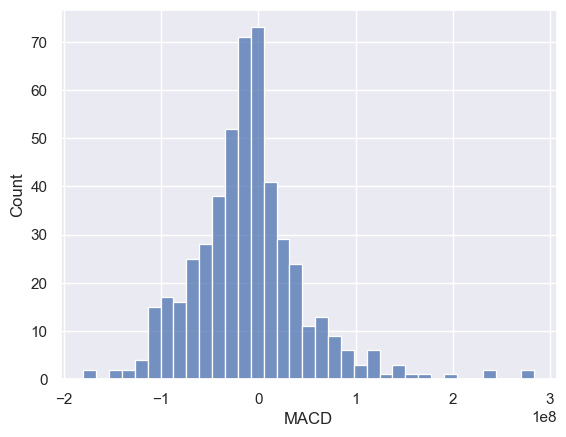

In [7]:
calculateMACD(df)

# Displaying results
sns.histplot(df['MACD'])

<Axes: xlabel='SIGNAL', ylabel='Count'>

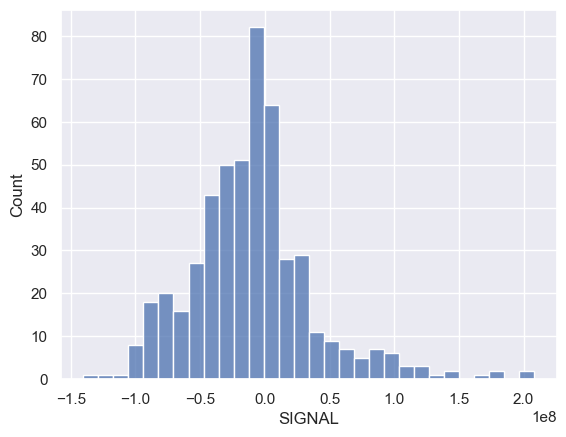

In [8]:
# Calculating Signals
exponential_moving_average(df, N_signal, 'SIGNAL')
sns.histplot(df['SIGNAL'])

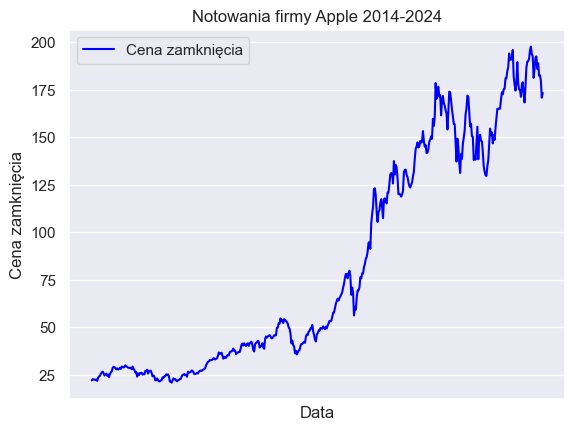

In [9]:
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
plt.xticks([])
plt.title('Notowania firmy Apple 2014-2024')
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()

C:\Users\jkrup\AppData\Local\Temp\ipykernel_23432\1143762577.py:21: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


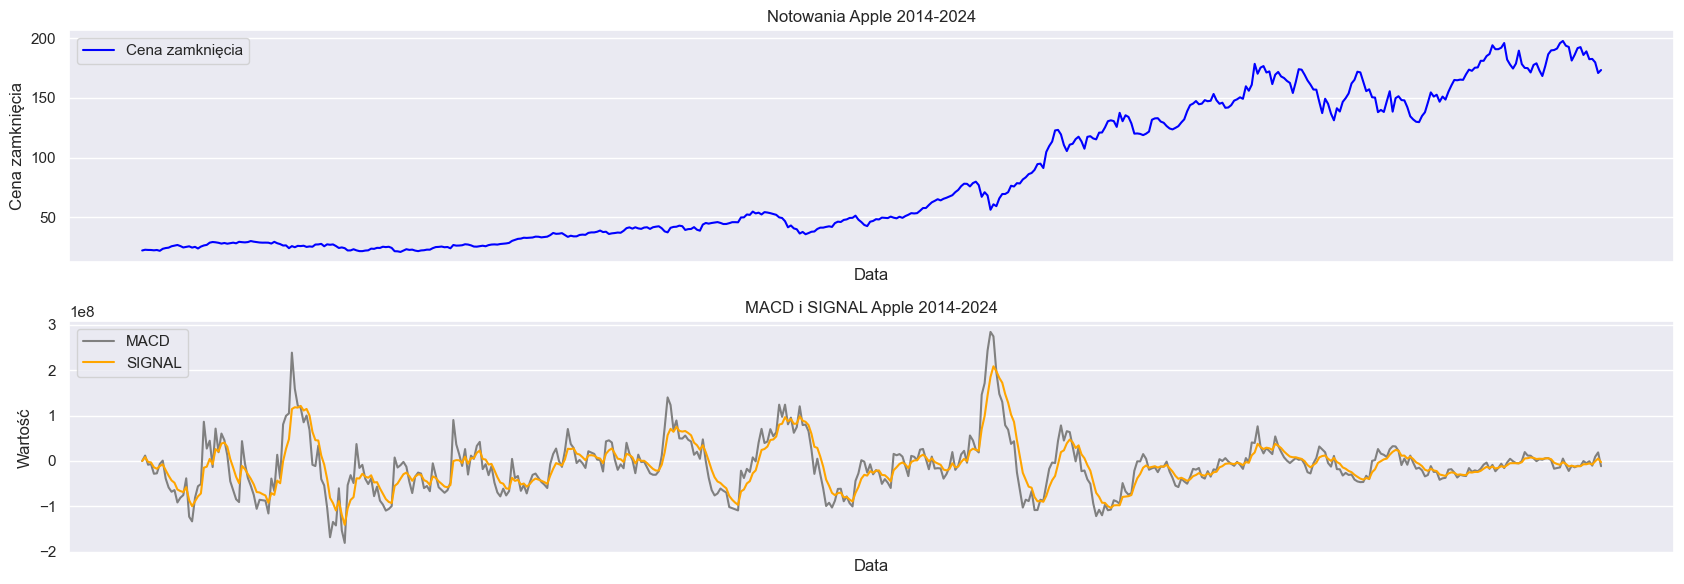

In [10]:
def plot_MACD_SIGNAL(df):
    plt.figure(figsize=(17, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
    plt.xticks([])
    plt.title('Notowania Apple 2014-2024')
    plt.xlabel('Data')
    plt.ylabel('Cena zamknięcia')
    plt.legend()
    plt.tight_layout()
    
    plt.subplot(2, 1, 2)
    plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
    plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
    plt.title('MACD i SIGNAL Apple 2014-2024')
    plt.xticks([])
    plt.xlabel('Data')
    plt.ylabel('Wartość')
    plt.legend(loc = 'upper left')
    plt.tight_layout()

# Displaying MACD and Signals
plot_MACD_SIGNAL(df)

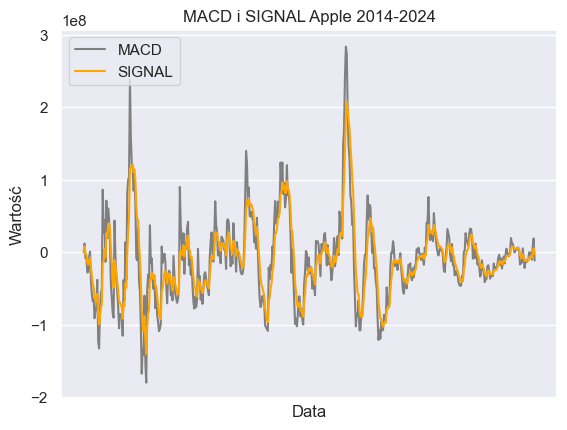

In [11]:
plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
plt.title('MACD i SIGNAL Apple 2014-2024')
plt.xticks([])
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.legend(loc = 'upper left')

In [12]:
def buy_sell(signal):
  Buy = []
  Sell = []
  flag = -1

  for i in range(0, len(signal)):
    if signal['MACD'][i] > signal['SIGNAL'][i]:
      Sell.append(np.nan)
      if flag != 1:
        Buy.append(signal['SIGNAL'][i])
        flag = 1
      else:
        Buy.append(np.nan)
    elif signal['MACD'][i] < signal['SIGNAL'][i]:
      Buy.append(np.nan)
      if flag != 0:
        Sell.append(signal['SIGNAL'][i])
        flag = 0
      else:
        Sell.append(np.nan)
    else:
      Buy.append(np.nan)
      Sell.append(np.nan)
  return (Buy, Sell)

In [13]:
a = buy_sell(df)
df['Buy_Signal_Price'] = a[0]
df['Sell_Signal_Price'] = a[1]

In [14]:
# Displaying data
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short,MACD,SIGNAL,Buy_Signal_Price,Sell_Signal_Price
0,2014-09-07,23.0926,23.2441,21.9112,22.1763,1.441329e+09,1.441329e+09,1.441329e+09,0.000000e+00,0.000000e+00,NaN,NaN
1,2014-09-14,22.2481,23.0946,21.5393,22.7785,2.061262e+09,1.865081e+09,1.876958e+09,1.187693e+07,8.483518e+06,8.483518e+06,NaN
2,2014-09-21,23.0387,23.0896,22.1574,22.6200,1.326479e+09,1.532338e+09,1.524105e+09,-8.233276e+06,-2.024713e+06,NaN,-2.024713e+06
3,2014-09-28,22.8095,23.0666,21.8952,22.5771,1.511160e+09,1.564729e+09,1.558014e+09,-6.714469e+06,-3.141277e+06,NaN,NaN
4,2014-10-05,22.1045,22.7516,21.9690,22.3209,1.105220e+09,1.401062e+09,1.373007e+09,-2.805565e+07,-1.391031e+07,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-02-18,188.4150,188.6700,181.3500,182.3100,2.681289e+08,2.648799e+08,2.643123e+08,-5.676575e+05,-5.368990e+06,NaN,NaN
494,2024-02-25,181.7900,185.0400,180.0000,182.5200,1.926071e+08,2.534236e+08,2.431486e+08,-1.027502e+07,-7.840310e+06,NaN,-7.840310e+06
495,2024-03-03,182.2400,183.9225,177.3800,179.6600,3.543859e+08,2.736827e+08,2.830087e+08,9.326001e+06,-6.784436e+05,-6.784436e+05,NaN
496,2024-03-10,176.1500,176.9000,168.4900,170.7300,3.932623e+08,2.863206e+08,3.052181e+08,1.889756e+07,5.415325e+06,NaN,NaN


In [15]:
def plot_buy_sell():
    plt.figure(figsize=(17, 6))
    plt.scatter(df.index, df['Buy_Signal_Price'], color='green', label='Buy', marker='^', alpha=1)
    plt.scatter(df.index, df['Sell_Signal_Price'], color='red', label='Sell', marker='v', alpha=1)
    
    plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
    plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
    plt.title('MACD i SIGNAL z punktami kupna/sprzedaży Apple 2014-2024')
    plt.xticks([])
    plt.xlabel('Data')
    plt.ylabel('Wartość')
    plt.legend(loc = 'upper left')
    plt.tight_layout()

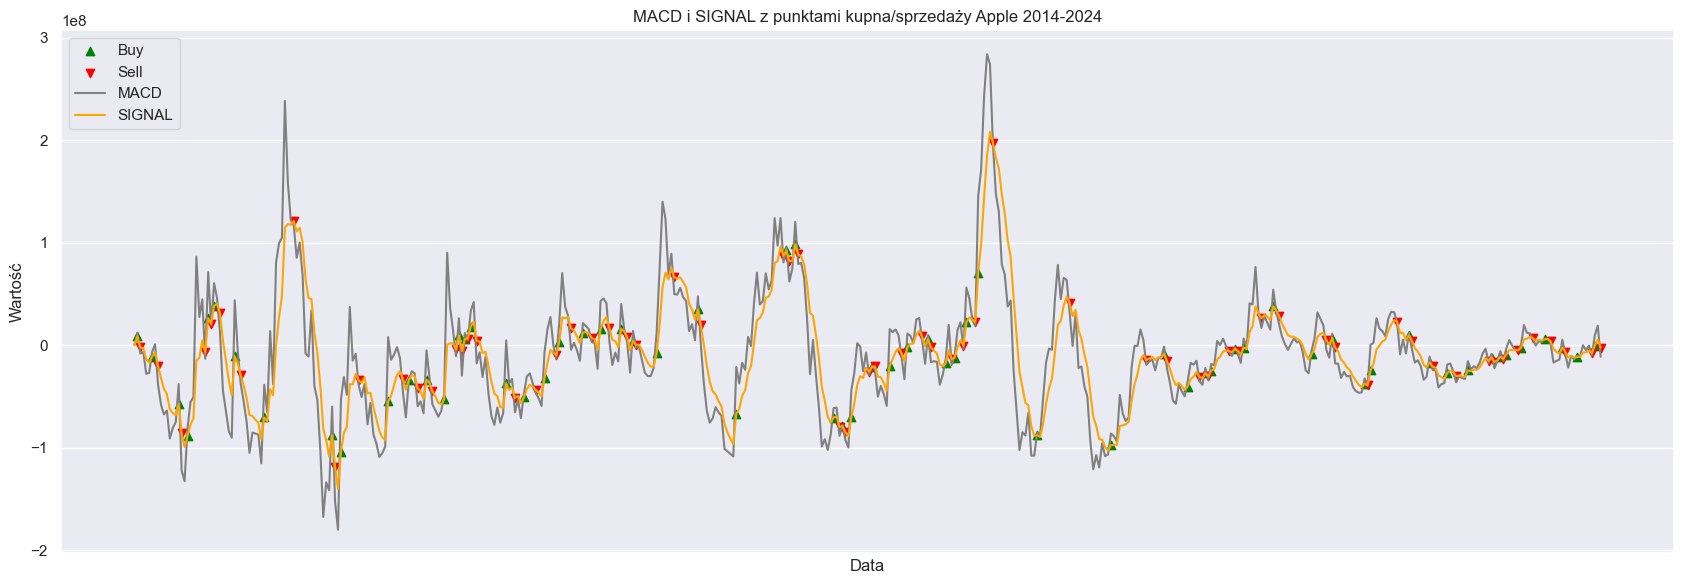

In [16]:
# Displaying MACD and Signals with Buy and Sell visualizations
plot_buy_sell()

# Implementing Trading Alghoritm

In [17]:
def MACD_trading_algorithm(df, initial_capital):
    bullish = 0  # Buy Signal
    bearish = 0  # Sell Signal
    position = 0  # Aktualna ilość akcji w portfelu

    buy_signal_prices = []
    sell_signal_prices = []
    
    df['buy_trading_alg'] = None
    df['sell_trading_alg'] = None

    for itr, row in df.iterrows():
        histogram = row['MACD'] - row['SIGNAL']

        if histogram > 0:
            bullish += 1
            bearish = 0
        if bullish > 0 and position == 0:
            buy_signal_prices.append(row['Zamkniecie'])
            df.at[itr, 'buy_trading_alg'] = row['Zamkniecie']
            position += initial_capital * 1.0 / row['Zamkniecie']
            bullish = 0
        else:
            bearish += 1
            bullish = 0

        if bearish > 1 and position > 0:
            sell_signal_prices.append(row['Zamkniecie'])
            df.at[itr, 'sell_trading_alg'] = row['Zamkniecie']
            initial_capital += position * row['Zamkniecie'] - initial_capital * 1.0
            position = 0
            bearish = 0

        if initial_capital <= 0:
            break

    return buy_signal_prices, sell_signal_prices, initial_capital


In [18]:
initial_capital = 1000
buy_signal_prices, sell_signal_prices, final_capital = MACD_trading_algorithm(df, initial_capital)

In [19]:
final_capital

1486.9141009066918

In [20]:
buy_signal_prices

[22.7785,
 21.8852,
 25.1563,
 25.2091,
 29.0195,
 29.1312,
 27.9707,
 24.2709,
 22.1903,
 21.5692,
 22.0707,
 24.1274,
 24.0048,
 27.3825,
 25.3716,
 30.1949,
 32.8936,
 35.0032,
 35.1488,
 36.9035,
 37.8695,
 40.8584,
 40.6659,
 40.7707,
 43.8821,
 49.838,
 43.0895,
 36.3681,
 46.2958,
 48.191,
 51.3125,
 48.3575,
 49.6286,
 53.4151,
 62.4665,
 67.3914,
 72.8488,
 75.8087,
 67.1093,
 94.8507,
 130.482,
 126.334,
 143.851,
 147.111,
 148.716,
 159.623,
 169.343,
 156.942,
 131.16,
 155.552,
 134.51,
 154.5,
 155.0,
 173.57,
 193.97,
 191.94,
 178.18,
 176.65,
 197.57,
 191.56,
 179.66]

In [21]:
sell_signal_prices

[22.5771,
 24.1982,
 24.603,
 29.2588,
 27.8461,
 29.2168,
 25.8551,
 24.0945,
 22.1006,
 22.6699,
 22.3828,
 25.1822,
 26.5541,
 25.4624,
 26.1562,
 32.115,
 33.1439,
 36.6812,
 34.0213,
 37.8645,
 36.7858,
 40.4486,
 41.3599,
 42.9589,
 44.6418,
 41.5702,
 39.9292,
 35.7729,
 47.7394,
 49.509,
 46.887,
 49.6815,
 50.9745,
 57.7279,
 65.0864,
 70.9755,
 77.9592,
 76.8536,
 59.2682,
 111.5,
 121.719,
 123.523,
 145.087,
 143.801,
 149.126,
 176.541,
 167.878,
 144.938,
 138.507,
 151.29,
 129.93,
 152.55,
 164.66,
 186.68,
 190.69,
 189.46,
 177.49,
 189.69,
 192.53,
 182.52,
 173.23]

In [22]:
df

,Data,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,EMA_long,EMA_short,MACD,SIGNAL,Buy_Signal_Price,Sell_Signal_Price,buy_trading_alg,sell_trading_alg
0,2014-09-07,23.0926,23.2441,21.9112,22.1763,1.441329e+09,1.441329e+09,1.441329e+09,0.000000e+00,0.000000e+00,NaN,NaN,None,None
1,2014-09-14,22.2481,23.0946,21.5393,22.7785,2.061262e+09,1.865081e+09,1.876958e+09,1.187693e+07,8.483518e+06,8.483518e+06,NaN,22.7785,None
2,2014-09-21,23.0387,23.0896,22.1574,22.6200,1.326479e+09,1.532338e+09,1.524105e+09,-8.233276e+06,-2.024713e+06,NaN,-2.024713e+06,None,None
3,2014-09-28,22.8095,23.0666,21.8952,22.5771,1.511160e+09,1.564729e+09,1.558014e+09,-6.714469e+06,-3.141277e+06,NaN,NaN,None,22.5771
4,2014-10-05,22.1045,22.7516,21.9690,22.3209,1.105220e+09,1.401062e+09,1.373007e+09,-2.805565e+07,-1.391031e+07,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,2024-02-18,188.4150,188.6700,181.3500,182.3100,2.681289e+08,2.648799e+08,2.643123e+08,-5.676575e+05,-5.368990e+06,NaN,NaN,None,None
494,2024-02-25,181.7900,185.0400,180.0000,182.5200,1.926071e+08,2.534236e+08,2.431486e+08,-1.027502e+07,-7.840310e+06,NaN,-7.840310e+06,None,182.52
495,2024-03-03,182.2400,183.9225,177.3800,179.6600,3.543859e+08,2.736827e+08,2.830087e+08,9.326001e+06,-6.784436e+05,-6.784436e+05,NaN,179.66,None
496,2024-03-10,176.1500,176.9000,168.4900,170.7300,3.932623e+08,2.863206e+08,3.052181e+08,1.889756e+07,5.415325e+06,NaN,NaN,None,None


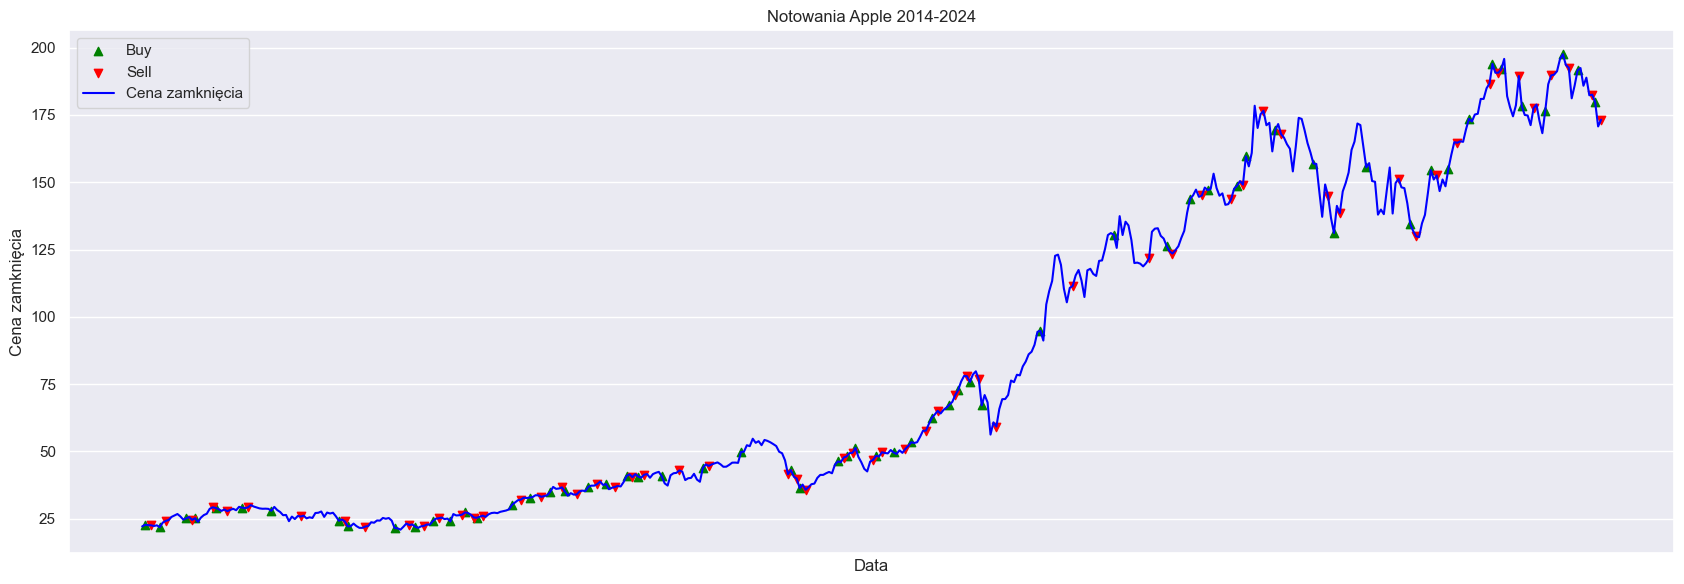

In [23]:
# Display the 'Sell' and 'Buy' moments of my trading alghoritm
plt.figure(figsize=(17, 6))
plt.scatter(df.index, df['buy_trading_alg'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['sell_trading_alg'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Data'], df['Zamkniecie'], label='Cena zamknięcia', color='blue')
plt.title('Notowania Apple 2014-2024')
plt.xticks([])
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.tight_layout()

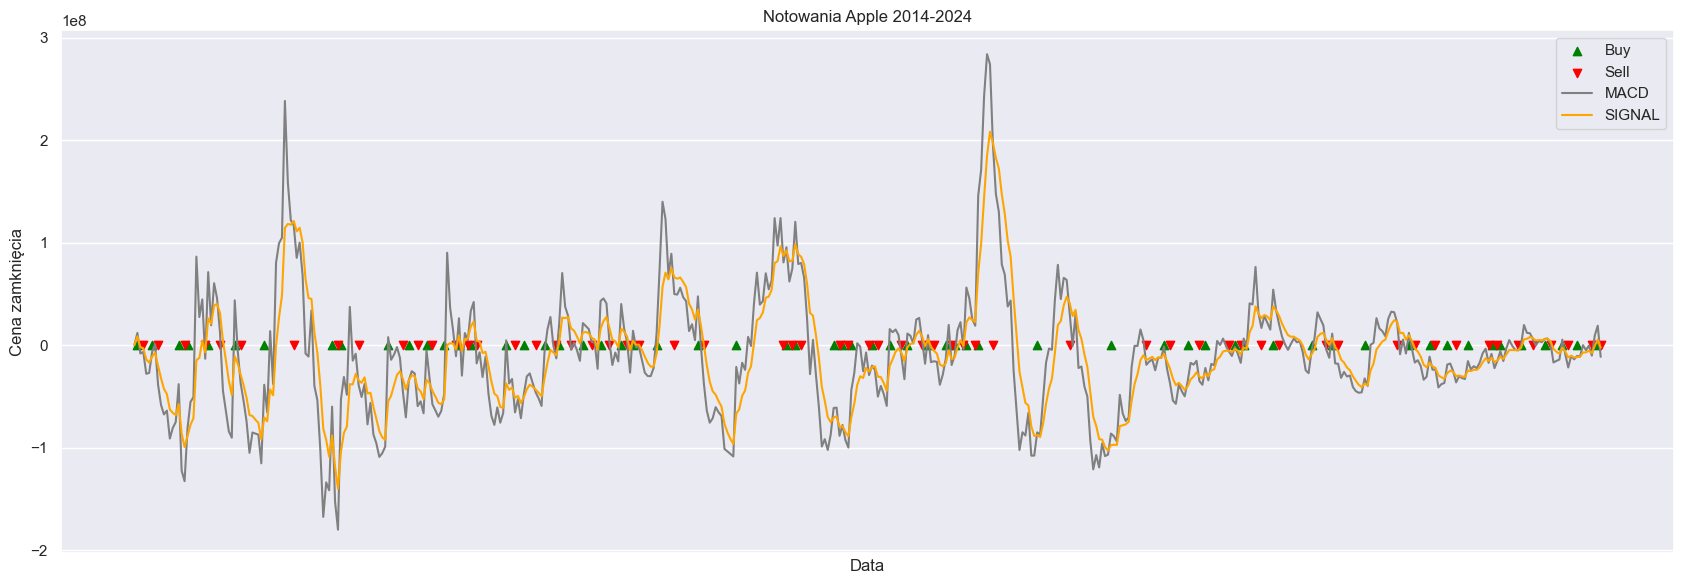

In [24]:
# Display the 'Sell' and 'Buy' moments of my trading alghoritm
plt.figure(figsize=(17, 6))
plt.scatter(df.index, df['buy_trading_alg'], color='green', label='Buy', marker='^', alpha=1)
plt.scatter(df.index, df['sell_trading_alg'], color='red', label='Sell', marker='v', alpha=1)
plt.plot(df['Data'], df['MACD'], label='MACD', color='grey')
plt.plot(df['Data'], df['SIGNAL'], label='SIGNAL', color='orange')
plt.title('Notowania Apple 2014-2024')
plt.xticks([])
plt.xlabel('Data')
plt.ylabel('Cena zamknięcia')
plt.legend()
plt.tight_layout()